# Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score,roc_curve,auc
import warnings
from sklearn.feature_selection import SelectKBest,f_classif
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings("ignore")

# Data Importation and Exploration

In [2]:
df=pd.read_csv('naija_fraud.csv')

In [3]:
df.head()

,AcountNumber,CVV,CardInformation,CustomerAge,Gender,Marital Status,Cards,CardColour,CardType,TransactionType,Domain,ATM,POSWEBLimit,CreditLimit,Amount,AverageIncomeExpendicture,NewBalance,OldBalance,Outcome
0,1275734409,364,755189,28.0,Male,Married,Debit,Gold,Verve,Credit,Local,150000,2000000,500000,129282,170919,460070,330788,0
1,1271246193,401,513706,25.0,Male,Single,Debit,Gold,Verve,Debit,International,150000,2000000,200000,574384,329353,136286,327052,1
2,1242290165,266,648473,21.0,Female,Married,Credit,White,Visa,Credit,International,120000,4000000,500000,190766,292922,448997,258231,0
3,1245478185,402,416049,26.0,Male,Unknown,Credit,White,Visa,Credit,Local,120000,4000000,500000,130395,145444,330071,199676,0
4,1258212072,334,459937,28.0,Female,Married,Debit,Gold,Verve,Credit,International,150000,2000000,500000,685145,295990,991630,306485,1


In [4]:
df.shape

(37097, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37097 entries, 0 to 37096
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AcountNumber               37097 non-null  int64  
 1   CVV                        37097 non-null  int64  
 2   CardInformation            37097 non-null  int64  
 3   CustomerAge                28246 non-null  float64
 4   Gender                     37097 non-null  object 
 5   Marital Status             37097 non-null  object 
 6   Cards                      37097 non-null  object 
 7   CardColour                 37097 non-null  object 
 8   CardType                   37097 non-null  object 
 9   TransactionType            37097 non-null  object 
 10  Domain                     37097 non-null  object 
 11  ATM                        37097 non-null  int64  
 12  POSWEBLimit                37097 non-null  int64  
 13  CreditLimit                37097 non-null  int

In [6]:
df=df.drop(['AcountNumber','CVV','CardInformation'],axis=1)

In [8]:
df=df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28246 entries, 0 to 37096
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerAge                28246 non-null  float64
 1   Gender                     28246 non-null  object 
 2   Marital Status             28246 non-null  object 
 3   Cards                      28246 non-null  object 
 4   CardColour                 28246 non-null  object 
 5   CardType                   28246 non-null  object 
 6   TransactionType            28246 non-null  object 
 7   Domain                     28246 non-null  object 
 8   ATM                        28246 non-null  int64  
 9   POSWEBLimit                28246 non-null  int64  
 10  CreditLimit                28246 non-null  int64  
 11  Amount                     28246 non-null  int64  
 12  AverageIncomeExpendicture  28246 non-null  int64  
 13  NewBalance                 28246 non-null  int

In [11]:
df.Outcome.value_counts()


1    20814
0     7432
Name: Outcome, dtype: int64

<AxesSubplot:>

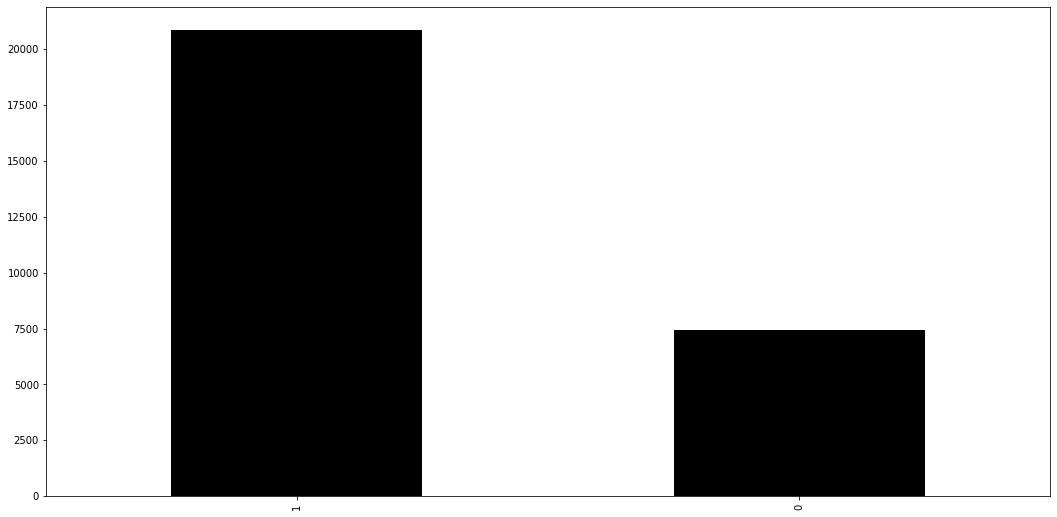

In [13]:
plt.figure(figsize=(18,9))
df.Outcome.value_counts().plot.bar(color='black')

In [14]:
df.head()

,CustomerAge,Gender,Marital Status,Cards,CardColour,CardType,TransactionType,Domain,ATM,POSWEBLimit,CreditLimit,Amount,AverageIncomeExpendicture,NewBalance,OldBalance,Outcome
0,28.0,Male,Married,Debit,Gold,Verve,Credit,Local,150000,2000000,500000,129282,170919,460070,330788,0
1,25.0,Male,Single,Debit,Gold,Verve,Debit,International,150000,2000000,200000,574384,329353,136286,327052,1
2,21.0,Female,Married,Credit,White,Visa,Credit,International,120000,4000000,500000,190766,292922,448997,258231,0
3,26.0,Male,Unknown,Credit,White,Visa,Credit,Local,120000,4000000,500000,130395,145444,330071,199676,0
4,28.0,Female,Married,Debit,Gold,Verve,Credit,International,150000,2000000,500000,685145,295990,991630,306485,1


In [16]:
df= pd.get_dummies(df, columns=['Gender','Marital Status','Cards','CardColour','CardType','TransactionType','Domain'], drop_first=True)

In [17]:
df

,CustomerAge,ATM,POSWEBLimit,CreditLimit,Amount,AverageIncomeExpendicture,NewBalance,OldBalance,Outcome,Gender_Male,Marital Status_Married,Marital Status_Single,Marital Status_Unknown,Cards_Debit,Cards_Prepaid,CardColour_White,CardType_Verve,CardType_Visa,TransactionType_Debit,Domain_Local
0,28.0,150000,2000000,500000,129282,170919,460070,330788,0,1,1,0,0,1,0,0,1,0,0,1
1,25.0,150000,2000000,200000,574384,329353,136286,327052,1,1,0,1,0,1,0,0,1,0,1,0
2,21.0,120000,4000000,500000,190766,292922,448997,258231,0,0,1,0,0,0,0,1,0,1,0,0
3,26.0,120000,4000000,500000,130395,145444,330071,199676,0,1,0,0,1,0,0,1,0,1,0,1
4,28.0,150000,2000000,500000,685145,295990,991630,306485,1,0,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37092,62.0,150000,2000000,500000,534813,198167,794190,259377,1,0,1,0,0,1,0,0,1,0,0,1
37093,20.0,150000,2000000,500000,178903,147133,468317,289414,0,1,0,0,0,1,0,0,1,0,0,1
37094,67.0,120000,4000000,150000,301594,256814,385770,598596,1,1,1,0,0,0,0,1,0,1,1,0
37095,58.0,150000,2000000,500000,212826,113439,635798,422972,0,0,0,0,1,1,0,0,1,0,0,0


# Data Preprocessing

# Data Splitting

In [19]:
x = df.drop(['Outcome'],axis=1)
y = df.Outcome

# Feature Selection

In [20]:
select=SelectKBest(score_func=f_classif,k=7)
z=select.fit_transform(x,y)
flt=select.get_support()
s=x.columns
print(s[flt])

Index(['POSWEBLimit', 'CreditLimit', 'Amount', 'AverageIncomeExpendicture',
       'NewBalance', 'Cards_Prepaid', 'TransactionType_Debit'],
      dtype='object')


In [21]:
x=df[['POSWEBLimit', 'CreditLimit', 'Amount', 'AverageIncomeExpendicture',
       'NewBalance', 'Cards_Prepaid', 'TransactionType_Debit']]

# Data Balancing

In [22]:
smote=SMOTE()
x_resampled,y_resampled=smote.fit_resample(x,y)
scaled = MinMaxScaler()
x_resampled = scaled.fit_transform(x_resampled)
scaled = StandardScaler()
x_resampled = scaled.fit_transform(x_resampled)
u,v=np.unique(y_resampled,return_counts=True)
for x in range(len(u)):
  print(u[x],'=',v[x])


0 = 20814
1 = 20814


# Training and Testing splits

In [23]:
x_train_resampled,x_test,y_train_resampled,y_test=train_test_split(x_resampled,y_resampled,test_size=.2,random_state=42)

# Model Development and Evaluations

In [29]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [31]:
model=Sequential()
model.add(Dense(124,activation='relu',input_shape=(7,)))
model.add(Dense(64,activation='relu'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
his=model.fit(x_train_resampled,y_train_resampled,epochs=100,batch_size=64,validation_data=(x_test, y_test))
y_pred=model.predict(x_test)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 124)               992       
                                                                 
 dense_7 (Dense)             (None, 64)                8000      
                                                                 
 flatten_2 (Flatten)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 flatten_3 (Flatten)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 32)               

Epoch 47/100
521/521 [==============================] - 2s 4ms/step - loss: 0.0070 - accuracy: 0.9975 - val_loss: 0.0084 - val_accuracy: 0.9962
Epoch 48/100
521/521 [==============================] - 2s 4ms/step - loss: 0.0056 - accuracy: 0.9978 - val_loss: 0.0050 - val_accuracy: 0.9984
Epoch 49/100
521/521 [==============================] - 2s 4ms/step - loss: 0.0056 - accuracy: 0.9977 - val_loss: 0.0129 - val_accuracy: 0.9956
Epoch 50/100
521/521 [==============================] - 2s 4ms/step - loss: 0.0057 - accuracy: 0.9981 - val_loss: 0.0173 - val_accuracy: 0.9951
Epoch 51/100
521/521 [==============================] - 2s 4ms/step - loss: 0.0057 - accuracy: 0.9975 - val_loss: 0.0037 - val_accuracy: 0.9990
Epoch 52/100
521/521 [==============================] - 2s 4ms/step - loss: 0.0046 - accuracy: 0.9981 - val_loss: 0.0125 - val_accuracy: 0.9962
Epoch 53/100
521/521 [==============================] - 2s 4ms/step - loss: 0.0070 - accuracy: 0.9974 - val_loss: 0.0114 - val_accuracy:

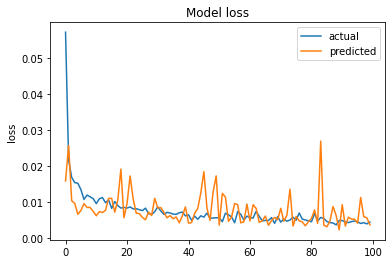

In [33]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.legend(['actual','predicted'])
plt.title('Model loss')
plt.ylabel('loss')
plt.show()

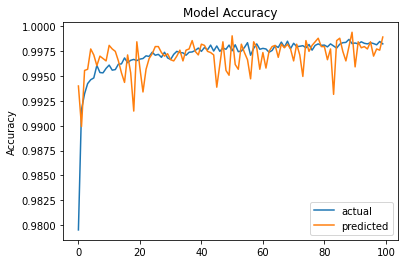

In [34]:
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.legend(['actual','predicted'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
model=Sequential()
model.add(Dense(64,activation='relu',input_shape=(7,)))
model.add(Dense(64,activation='relu'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
his=model.fit(x_train_resampled,y_train_resampled,epochs=100,batch_size=64,validation_data=(x_test, y_test))
y_pred=model.predict(x_test)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                512       
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 flatten_4 (Flatten)         (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                                 
Total params: 8,897
Trainable params: 8,897
Non-traina

In [ ]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.legend(['actual','predicted'])
plt.title('Model loss')
plt.ylabel('loss')
plt.show()

F1-score: 0.998055893074119


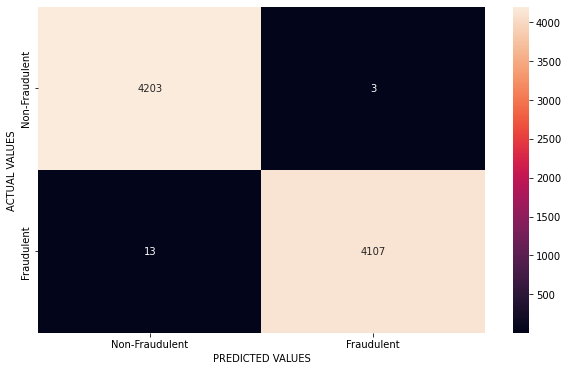

In [24]:
mlp_model=MLPClassifier()
mlp_model.fit(x_train_resampled,y_train_resampled)
y_pred_mlp=mlp_model.predict(x_test)
print('F1-score:',f1_score(y_test,y_pred_mlp))
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,y_pred_mlp),annot=True,fmt='.0f')
fx.set_xlabel('PREDICTED VALUES')
fx.set_ylabel('ACTUAL VALUES')
fx.xaxis.set_ticklabels(['Non-Fraudulent', 'Fraudulent'])
fx.yaxis.set_ticklabels(['Non-Fraudulent', 'Fraudulent'])
plt.show()

F1-score: 0.9996357897292704


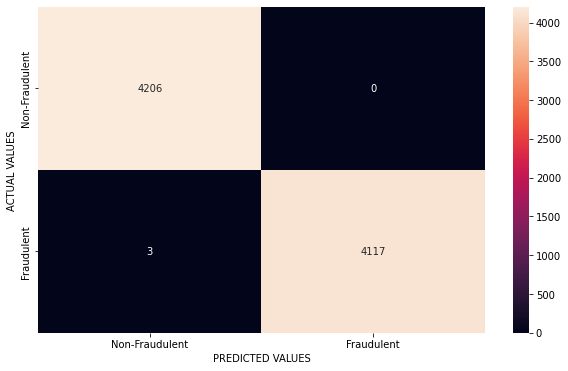

In [25]:
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train_resampled,y_train_resampled)
y_pred_dt=dt_model.predict(x_test)
print('F1-score:',f1_score(y_test,y_pred_dt))
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,y_pred_dt),annot=True,fmt='.0f')
fx.set_xlabel('PREDICTED VALUES')
fx.set_ylabel('ACTUAL VALUES')
fx.xaxis.set_ticklabels(['Non-Fraudulent', 'Fraudulent'])
fx.yaxis.set_ticklabels(['Non-Fraudulent', 'Fraudulent'])
plt.show()

F1-score: 0.9997572226268512


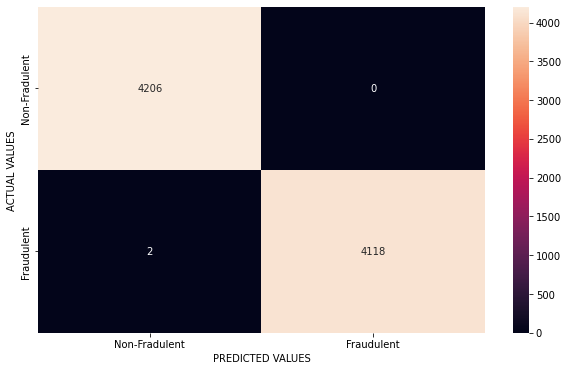

In [26]:
rf_model=RandomForestClassifier()
rf_model.fit(x_train_resampled,y_train_resampled)
y_pred_rf=rf_model.predict(x_test)
print('F1-score:',f1_score(y_test,y_pred_rf))
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,y_pred_rf),annot=True,fmt='.0f')
fx.set_xlabel('PREDICTED VALUES')
fx.set_ylabel('ACTUAL VALUES')
fx.xaxis.set_ticklabels(['Non-Fradulent', 'Fraudulent'])
fx.yaxis.set_ticklabels(['Non-Fradulent', 'Fraudulent'])
plt.show()

F1-score: 0.9940178244414601


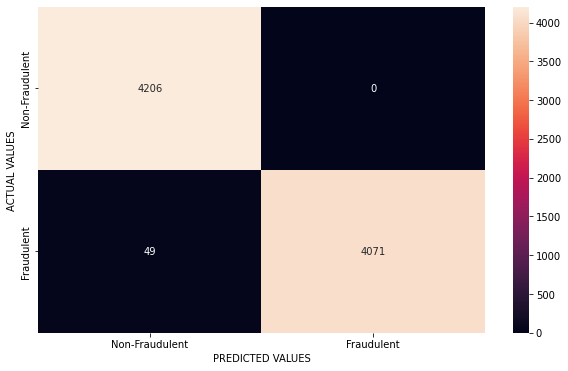

In [27]:
lg_model=LogisticRegression()
lg_model.fit(x_train_resampled,y_train_resampled)
y_pred_lg=lg_model.predict(x_test)
print('F1-score:',f1_score(y_test,y_pred_lg))
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,y_pred_lg),annot=True,fmt='.0f')
fx.set_xlabel('PREDICTED VALUES')
fx.set_ylabel('ACTUAL VALUES')
fx.xaxis.set_ticklabels(['Non-Fraudulent', 'Fraudulent'])
fx.yaxis.set_ticklabels(['Non-Fraudulent', 'Fraudulent'])
plt.show()